In [34]:
from fipy import Variable, FaceVariable, CellVariable, Grid1D, ExplicitDiffusionTerm, TransientTerm, DiffusionTerm, Viewer
from fipy.tools import numerix

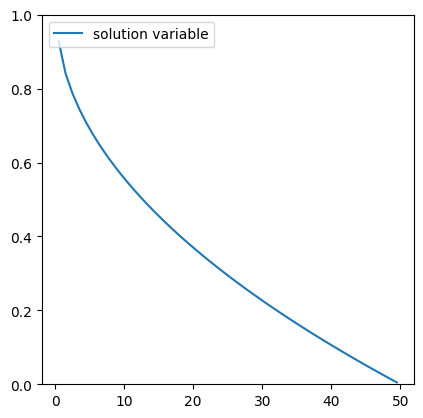

In [35]:
#STEADY STATE
nx = 50
dx = 1.
mesh = Grid1D(nx=nx, dx=dx)

D0 = 5

phi = CellVariable(name="solution variable", mesh=mesh) #might need a has old in here
eq = DiffusionTerm(coeff=D0 * (1 - phi)) #To do transient you have to say the time-steps and the number of steps that you want to run

#boundry conditions
valueLeft = 1
valueRight = 0
phi.constrain(valueRight, mesh.facesRight)
phi.constrain(valueLeft, mesh.facesLeft)

#reset the initial conditions
phi.setValue(0)

res = 1e+10
while res > 1e-6:
    res = eq.sweep(var=phi)

viewer = Viewer(vars=phi, datamin=0., datamax=1.)

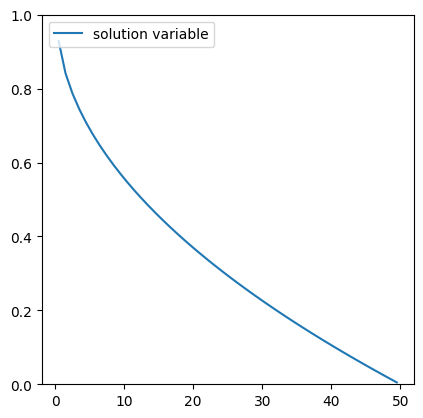

In [ ]:
#TRANSIENT without has old
timeStep = 1
steps = 500

phiNoOld = CellVariable(name="solution variable", mesh=mesh) #might need a has old in here
eq = TransientTerm() == DiffusionTerm(coeff=D0 * (1 - phiNoOld)) #To do transient you have to say the time-steps and the number of steps that you want to run

#boundry conditions
valueLeft = 1
valueRight = 0
phiNoOld.constrain(valueRight, mesh.facesRight)
phiNoOld.constrain(valueLeft, mesh.facesLeft)

#reset the initial conditions
phiNoOld.setValue(0)

for step in range(steps):
    eq.solve(var=phiNoOld, dt=timeStep)

viewer = Viewer(vars=phiNoOld, datamin=0., datamax=1.)

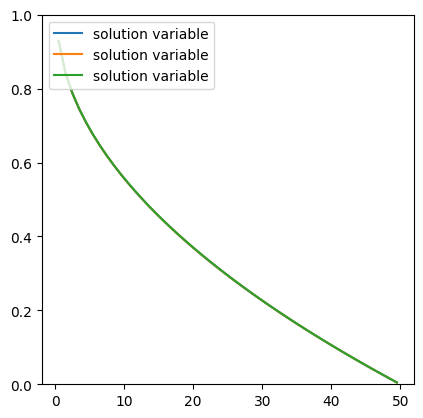

In [ ]:
#TRANSIENT with has old MIGHT BE GOOD TO HAVE WHEN YOU HAVE WHEN YOU HAVE A LARGE SYSTEM OF EQUATIONS
timeStep = 1
steps = 500

phiOld = CellVariable(name="solution variable", mesh=mesh, hasOld=1)
eq = TransientTerm() == DiffusionTerm(coeff=D0 * (1 - phiOld))

#boundry conditions
valueLeft = 1
valueRight = 0
phiOld.constrain(valueRight, mesh.facesRight)
phiOld.constrain(valueLeft, mesh.facesLeft)

#reset the initial conditions
phiOld.setValue(0)

for step in range(steps):
    phiOld.updateOld()
    res = 1e+10
    while res > 1e-6:
        res = eq.sweep(var=phiOld, dt=timeStep) #returns a resolution (a measure of how good ur solution is) only once good does it move on to the next time step

viewer = Viewer(vars=[phiNoOld,phiOld,phi], datamin=0., datamax=1.)